# Omówienie

# Przykłady

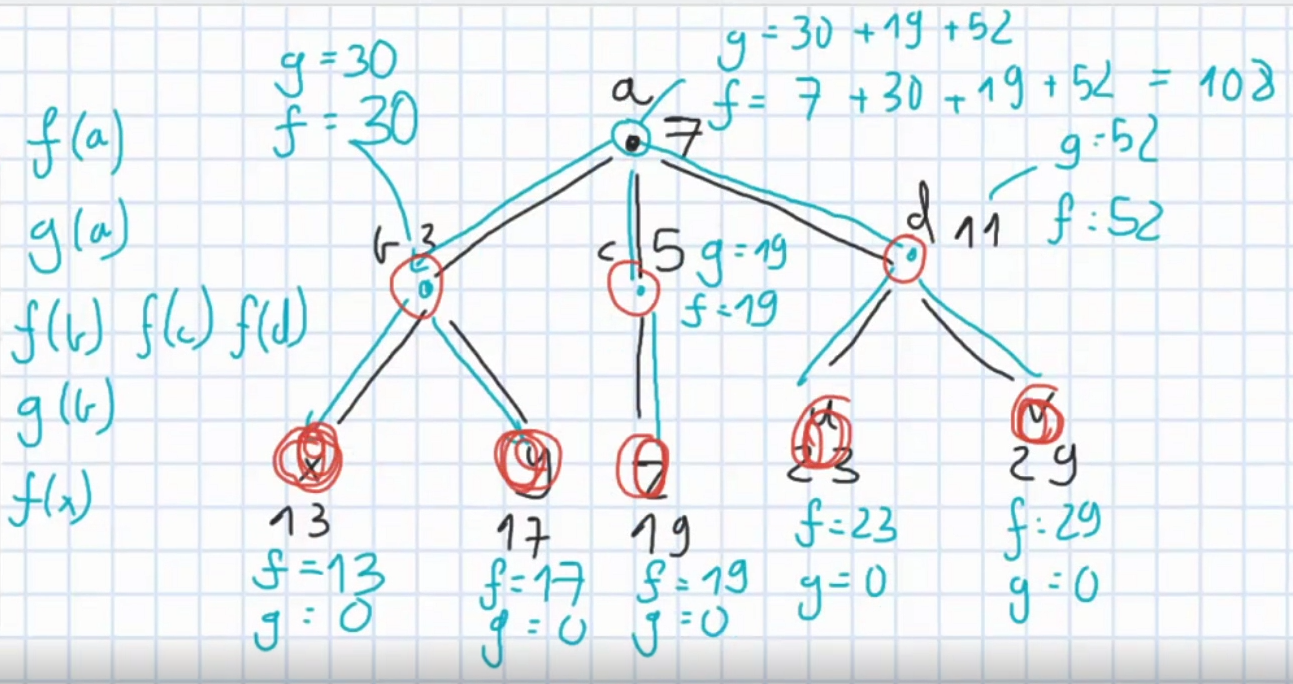

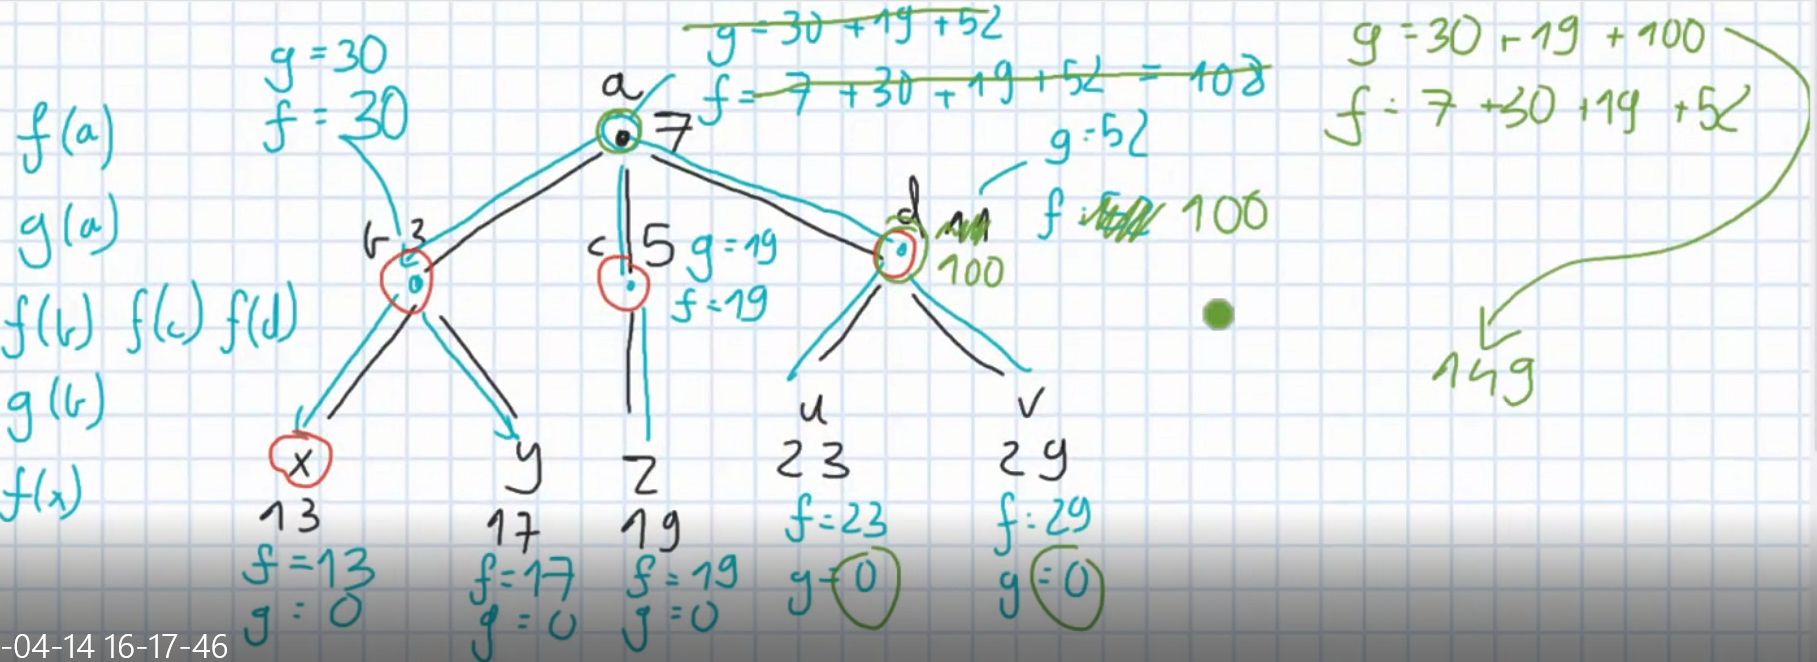

### Złożoność

###### Obliczeniowa
$ O(T) $, gdzie $ T $ - liczba węzłów/wierzchołków w drzewie
###### Pamięciowa
$ O(T) $

# Implementacja

In [1]:
class Employee:
    def __init__(self, fun, employees=[]):
        self.fun = fun
        self.f = -1
        self.g = - 1
        self.emp = employees
        
    def __str__(self):
        return f"Fun: {self.fun:<5} f: {self.f:<5} g: {self.g:<5}"
        
    
def f(v):
    if v.f < 0:
        x = v.fun
        for e in v.emp:
            x += g(e)
        y = g(v)
        v.f = max(x, y)
    return v.f
    
    
def g(v):
    if v.g < 0:
        v.g = 0
        for e in v.emp:
            v.g += f(e)
    return v.g

##### Albo krócej, ale mniej efektywnie:

In [2]:
def f(v):
    if v.f < 0: v.f = max(v.fun + sum(g(u) for u in v.emp), g(v))
    return v.f


def g(v):
    if v.g < 0: v.g = sum(f(u) for u in v.emp)
    return v.g

###### Kilka testów

In [3]:
root = Employee(7, 
                 [Employee(3, 
                           [Employee(13), Employee(17)]
               ), Employee(5, 
                           [Employee(19)]
               ), Employee(11, 
                           [Employee(23), Employee(29)]
               )])

print(f(root))

108


In [4]:
from collections import deque

def bfs(root):
    q = deque([root])
    
    while q:
        r = q.popleft()
        q.extend(r.emp)
        print(r)

In [5]:
bfs(root)

Fun: 7     f: 108   g: 101  
Fun: 3     f: 30    g: 30   
Fun: 5     f: 19    g: 19   
Fun: 11    f: 52    g: 52   
Fun: 13    f: 13    g: 0    
Fun: 17    f: 17    g: 0    
Fun: 19    f: 19    g: 0    
Fun: 23    f: 23    g: 0    
Fun: 29    f: 29    g: 0    


In [6]:
root = Employee(7, 
                 [Employee(3, 
                           [Employee(13), Employee(17)]
               ), Employee(5, 
                           [Employee(19)]
               ), Employee(100, 
                           [Employee(23), Employee(29)]
               )])

print(f(root))

149


### (Dodatkowo) Odtwarzanie rozwiązania

In [7]:
from collections import deque


def get_party_participants(root: 'root employee after running an algorithm above'):
    q = deque([root])
    res = []
    
    while q:
        r = q.popleft()
        
        # We take an employee only if its 'g' value is not the same as 'f' value. That
        # means we have to take this employee as 'f' is greater than 'g'.
        if r.f > r.g: 
            res.append(r)
            # Skip current employee's employees when this employee
            # will be present at the party
            for e in r.emp:
                q.extend(e.emp)
        else:
            q.extend(r.emp)
            
    return res

###### Kilka testów

In [8]:
root = Employee(7, 
                 [Employee(3, 
                           [Employee(13), Employee(17)]
               ), Employee(5, 
                           [Employee(19)]
               ), Employee(11, 
                           [Employee(23), Employee(29)]
               )])

f(root)
print(*get_party_participants(root), sep='\n')

Fun: 7     f: 108   g: 101  
Fun: 13    f: 13    g: 0    
Fun: 17    f: 17    g: 0    
Fun: 19    f: 19    g: 0    
Fun: 23    f: 23    g: 0    
Fun: 29    f: 29    g: 0    


In [9]:
root = Employee(7, 
                 [Employee(3, 
                           [Employee(13), Employee(17)]
               ), Employee(5, 
                           [Employee(19)]
               ), Employee(100, 
                           [Employee(23), Employee(29)]
               )])

f(root)
print(*get_party_participants(root), sep='\n')

Fun: 100   f: 100   g: 52   
Fun: 13    f: 13    g: 0    
Fun: 17    f: 17    g: 0    
Fun: 19    f: 19    g: 0    
